# Signal and Image Processing (SIP_SS24)

### Research Group Neuroinformatics, Faculty of Computer Science,
### University of Vienna


###  Convolution Tutorial

Lecturer: Prof. Moritz GROSSE-WENTRUP

Tutorial by: Sadiq A. ADEDAYO
$\quad\quad\quad\quad$ Jakob PRAGER 
$\quad\quad\quad\quad$ Kerim ATAK (kerim.atak@univie.ac.at)

In [1]:
# imports packages required (Numpy and Matplotlib)

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Convolution

The convolution operation in signal processing expresses the amount of overlap of one signal shifted over another. As notation, we adopt commonly used representations such as `y[n]` as result or output of convolution, `x[n]` as the signal and `h[n]` as impulse response of the system in which `x[n]` is fed into.

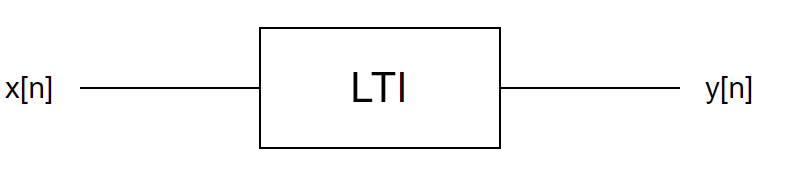

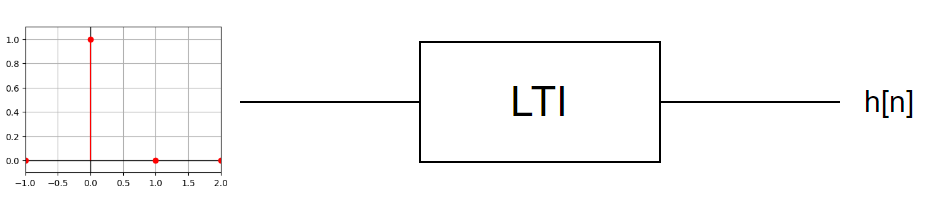

#### We will implement the linear convolution of discrete signals as discussed in the lecture.

$$y[n] = x[n] * h[n] = \sum_{k = - \infty}^{\infty} x[k] \cdot h[n - k] $$

The following animations below will be used to illustrate the modes of the convolution. One shows the digital and one the continous convolution.

Sources 
- [Digital signal](https://e2eml.school/convolution_one_d.html)
- [Continous signal](https://commons.wikimedia.org/wiki/File:Convolution_of_box_signal_with_itself2.gif)

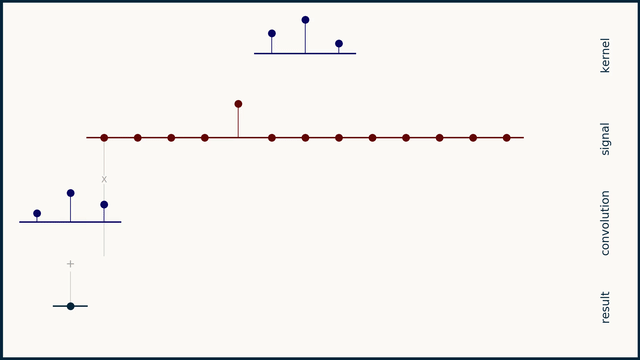

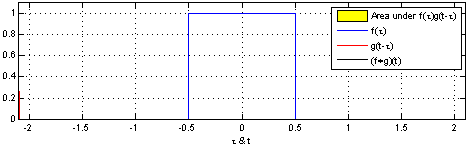

In the following code cell, write a function to compute linear convolution `lin_convolution(x, h)` that takes two inputs; signal `x[n]` and impulse response `h[n]` and computes and returns the convolved signal `y[n]`. In this case, we will explore the mode where one of the signals slide over the other completely, i.e., `mode = full` in [np.convolve(mode='full')](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) implementations. </br>

You are encouraged to use the hints provided to solve the task; however, please note that these are merely suggestions. Please note, this implementation is not optimized for run time, hence more time efficient implementations exist as that of [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) and [scipy.signal.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

In [2]:
# Function to plot signals
# For adequate visualization of results, we will use the stem plot from matplotlib

def plot_signal(x, title, xlabel, ylabel, figsize=(6, 8), subplot=None):
    if subplot is not None:
        plt.subplot(subplot) 
    else:
        plt.figure(figsize=figsize)
    plt.stem(x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, rotation=60)
    plt.xticks(np.arange(0, len(x), step=1))
    plt.grid()

In [3]:
def lin_convolution(x, h):
    # determine the size of convolution output
    N = len(x) + len(h)-1
    
    # initialize array of zeros for the output signal
    y = np.zeros(N)
    
    # determine number of zeros required to pad both `x[t]` and `h[t]`, i and j respectively
    i = N - len(x) 
    j = N - len(h)
    
    # zero-pad x[t] and h[t] to the same size
    x_padded = np.pad(x, (0, i), 'constant')
    h_padded = np.pad(h, (0, j), 'constant')
    
    
    # perform linear convolution
    for n in range(N): 
        for k in range(N):
            if n >= k:
                y[n] += x_padded[n-k]*h_padded[k]
            
    return y

Next, we will test `lin_convolution(x, h)` with some signals and compare the results with that of numpy implementation.

For sake of uniformity, we will take `x[n]` = [1, 2, 0, 1] and `h_[t]` = [2, 2, 1, 1].

We would expect our function to return `y[n]` = [2, 6, 5, 5, 4, 1, 1] which is the same as using `np.convolve(x, h, mode = 'full')`. 

After we confirmed our funtion is working properly, we can then try out other various signals of various lengths.

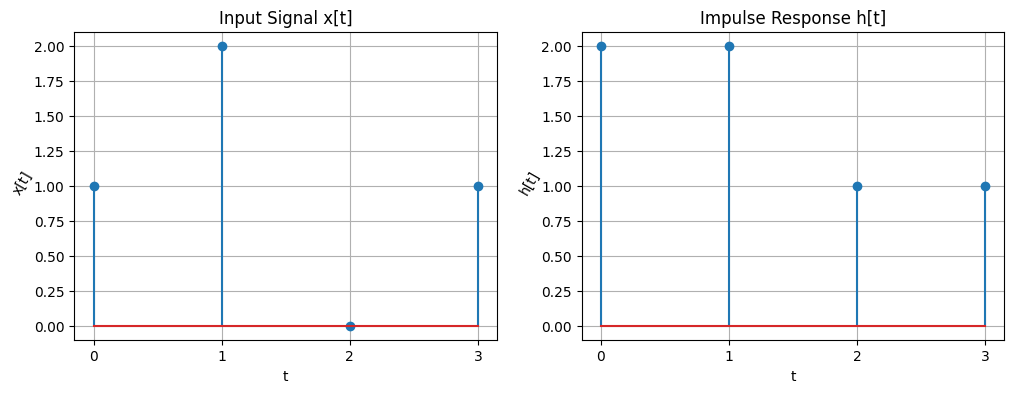

In [4]:
# Define the input signal x[t] and the impulse response h[t]

x = [1, 2, 0, 1]
h = [2, 2, 1, 1]



# plot the input signal x[t] and the impulse response h[t]

plt.figure(figsize=(12, 4))
plot_signal(x, 'Input Signal x[t]', 't', 'x[t]', subplot=121)
plot_signal(h, 'Impulse Response h[t]', 't', 'h[t]', subplot=122)
plt.show()

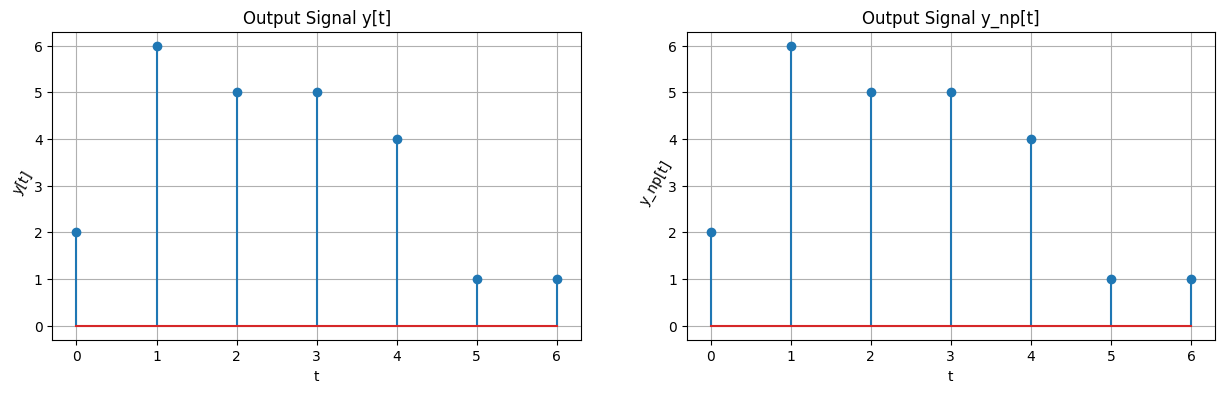

In [5]:
y = lin_convolution(x, h)  # call the written function here on x and h 
y_np = np.convolve(x, h, mode = 'full') # call the numpy convolve() function with mode "full" on x and h



# plot the output signal y[t] and the output signal y_np[t]

plt.figure(figsize=(15, 4))
plot_signal(y, 'Output Signal y[t]', 't', 'y[t]', subplot=121)
plot_signal(y_np, 'Output Signal y_np[t]', 't', 'y_np[t]', subplot=122)
plt.show()

### 3 modes of convolution

Besides the `full` mode, there are two other modes of convolution: `valid` and `same`. These modes do not fundamentally alter the convolution process itself. They dictate how the edges of the input data are handled and, consequently, the size of the output.  The results of both these modes can be derived from the `full` mode convolution.

#### Valid Mode
In the 'valid' mode, the convolution operation is performed only at points where the signals fully overlap. This means that any part of the signals extending beyond the boundary of the other has no influence on the result. Put simply, this mode considers only those shifts where the shorter signal is entirely contained within the longer one. </br>
The output size is smaller than the input size.

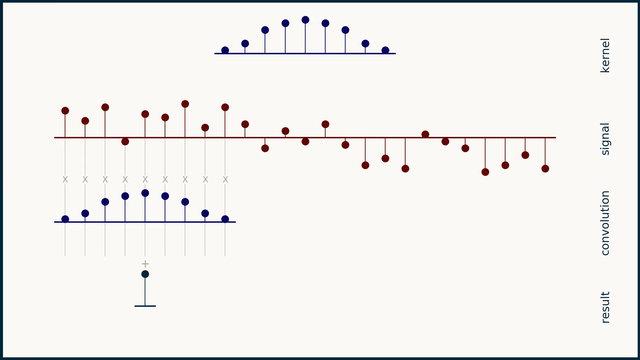

[Source](https://e2eml.school/convolution_one_d.html)

In the following, the numpy convolution mode "valid" is implemented.

In [6]:
def lin_convolution_valid(x, h):

    # perform linear convolution
    y = lin_convolution(x, h)


    # truncating result of "full" convolution

    p = np.max([len(x), len(h)]) - np.min([len(x), len(h)]) + 1     # p is the length of the sequence after truncation
    s = len(y)      # s is the length of the sequence after convolution
    
    if p%2 == 1:
        conv = y[s//2-p//2 : s//2+p//2+1]
    else:
        conv = y[s//2-p//2 : s//2+p//2]

    return conv.astype(int)

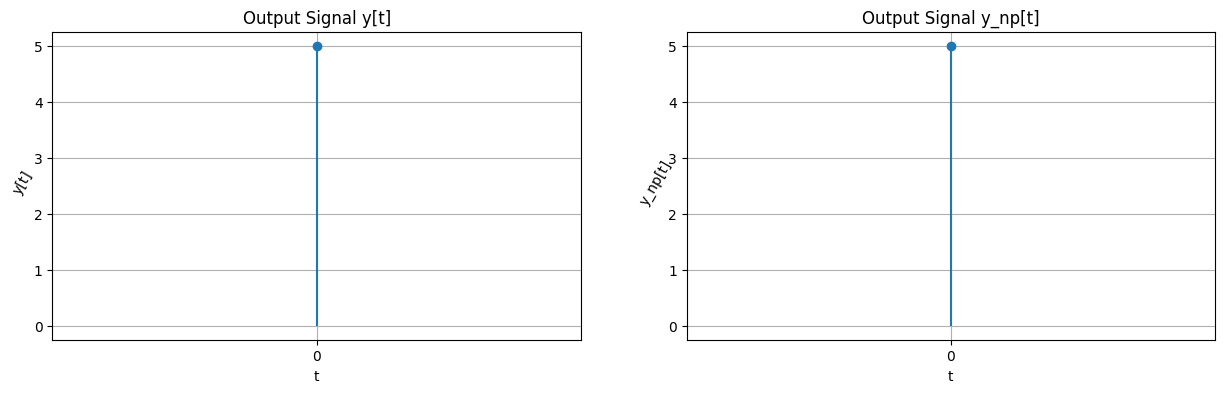

In [7]:
y = lin_convolution_valid(x, h)  # call the written function here on x and h
y_np = np.convolve(x, h, mode = 'valid') # call the numpy convolve() function with mode "valid" on x and h



# plot the output signal y[t] and the output signal y_np[t]

plt.figure(figsize=(15, 4))
plot_signal(y, 'Output Signal y[t]', 't', 'y[t]', subplot=121)
plot_signal(y_np, 'Output Signal y_np[t]', 't', 'y_np[t]', subplot=122)
plt.show()

#### Same Mode
The same mode in convolution ensures that the output length matches the length of the longer input signal. This mode is useful for maintaining a consistent output size. It achieves this by selecting a portion of the full convolution output, so the result is the same length as the original signal. Typically, the middle section of the full convolution output is used.

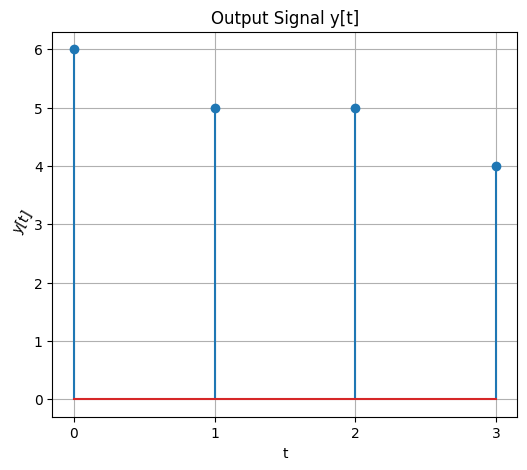

In [8]:
y_np = np.convolve(x, h, mode='same') # call the numpy convolve() function with mode "same" on x and h

# plot the output signal y[t] and the output signal y_np[t]


plot_signal(y_np, 'Output Signal y[t]', 't', 'y[t]', figsize=(6, 5))

## 2d Convolution

### Images are 2d signals

Until now, we've considered only 1-dimensonal signals with amplitude values changing over time. However, a signal can be multidimensional. Still images, for instance are two-dimensional signals, where instead of time, the two axes represent spatial dimensions — height and width. The amplitude/pixel value represents the intensity or color at a specific spatial location. </br>
</br>
In image processing, kernels are small matrices, essentially 2-dimensional signals, that are convolved with still images (2-diimensional signals) to change or enhance certain aspects of these images.

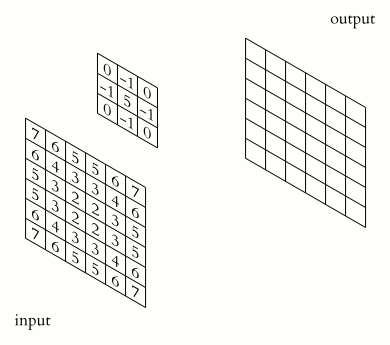

[Source](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution)

$$g(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} w(i,j)f(x - i, y - j)$$

g(x, y) is the result of the convolution of the kernel w with the image f at position (x, y).

In the following we will load an image and 2d-convolve it with various kernels. We will use the `scipy.signal.convolve2d()` function. </br> 
First, we will load a sample image from [scipy.datasets](https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.ascent.html#scipy.datasets.ascent).

In [9]:
image = sp.datasets.ascent().astype(np.float32)
print(image.shape)

(512, 512)


The 'image' variable contains the loaded image data in grayscale format.
The shape of the image is (512, 512), which means the image is 512 pixels high (rows) and 512 pixels wide (columns).

Let's define a kernel. Uncomment the kernel you want to use and comment the others:

In [14]:
# Identity kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# Simple edge detection kernel
# kernel = np.array([[1, 0, -1],
#                    [0, 0, 0],
#                    [-1, 0, 1]])

# Box blur kernel
# kernel = np.array([[1, 1, 1, 1, 1, 1],
#                     [1, 1, 1, 1, 1, 1],
#                     [1, 1, 1, 1, 1, 1],
#                     [1, 1, 1, 1, 1, 1],
#                     [1, 1, 1, 1, 1, 1],
#                     [1, 1, 1, 1, 1, 1]]) / 36

# Kernel to sharpen the image
# kernel = np.array([[0, -1, 0],
#                    [-1, 5, -1],
#                    [0, -1, 0]])

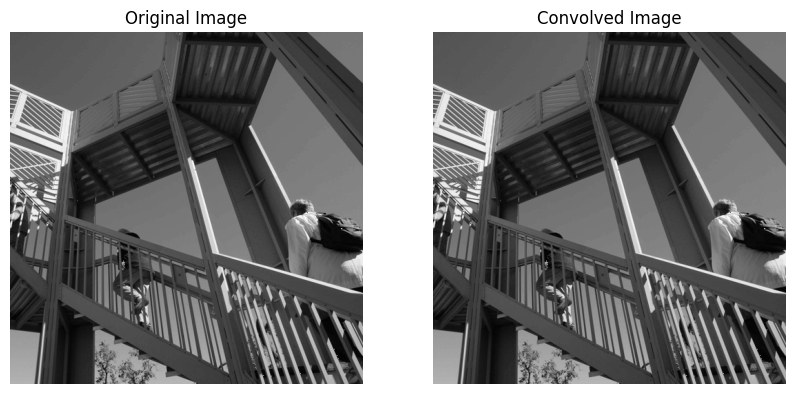

In [15]:
# Apply the kernel to the image using 2D convolution
convolved_image = sp.signal.convolve2d(image, kernel, mode='same')

# Clip the values to be between 0 and 255
convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)

# Plotting the original and convolved image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(convolved_image, cmap='gray')
ax2.set_title('Convolved Image')
ax2.axis('off')

plt.show()

## Conclusions

In this tutorial, we explored the concept of convolution. You are encouraged to look out other use cases to cement your understanding. Below are some additions and bonus tasks for your practice.

---------------------

## Addition

### Circular Convolution

In the following, a circular convolution implementation is provided.

In [12]:
def circ_convolution(x, h):
    # determine the size of convolution output
    N = max(len(x), len(h))

    # ensure that both x and h are of length N by zero-padding if necessary
    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant')
    if len(h) < N:
        h = np.pad(h, (0, N - len(h)), 'constant')

    # initialize array of zeros for the output signal
    y = np.zeros(N)

    # Perform circular convolution
    for n in range(N):
        for m in range(N):
            y[n] += x[m] * h[(n - m) % N]

    return y

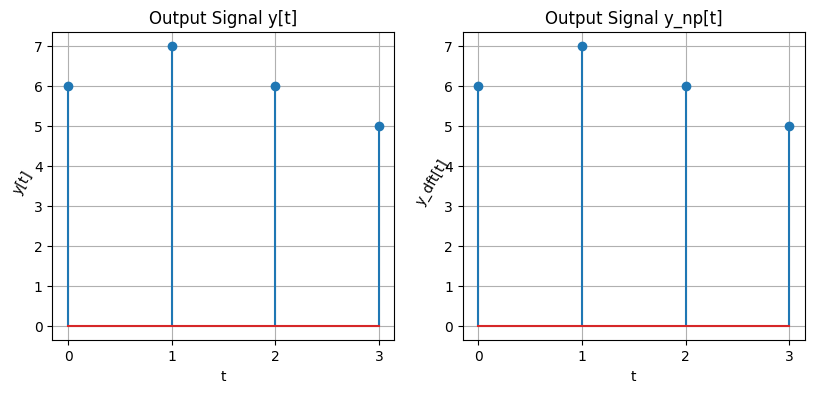

In [13]:
y = circ_convolution(x, h)


# For DFT, multiplication in the frequency domain is equivalent to circular convolution in the time domain
N = max(len(x), len(h))
X = np.fft.fft(x, n=N)
H = np.fft.fft(h, n=N)
Y = X * H
y_dft = np.fft.ifft(Y).real


# plot the output signal y[t] and the output signal y_np[t]

plt.figure(figsize=(15, 4))
plot_signal(y, 'Output Signal y[t]', 't', 'y[t]', subplot=131)
plot_signal(y_dft, 'Output Signal y_np[t]', 't', 'y_dft[t]', subplot=132)
plt.show()

## Bonus tasks

These tasks are given for more hands-on engagement of students. There will be no solutions or grading (i.e., they are only for students to explore for leisure).


Show that the convolution operation fulfills the following properties
 - Commutative i.e., $\quad x[n] * h[n] \quad = \quad h[n] * x[n]$ 

 - Associative i.e., $\quad (x_{1}[n] * h[n]) \quad * x_{2}[n] \quad = \quad x_{1}[n] \quad * (h[n] * x_{2}[n])$
 
 - Derrivative i.e., $\quad y[n] = x[n] * h[n]$
 
 $\quad\quad\quad\quad\quad\quad$ $\frac{dy[n]}{dn} \quad = \quad \frac{dx[n]}{dn} * h[n] \quad = \quad x[n] * \frac{dh[n]}{dn} $.